In [1]:
import numpy as np
import pandas as pd
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = pd.read_parquet("vhrdata").drop_duplicates(subset=None, keep='last', inplace=False).drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207576 entries, 0 to 3207575
Data columns (total 46 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   vin                       object 
 1   collect_ts                int64  
 2   uuid                      object 
 3   model_name                object 
 4   series_code               object 
 5   msg_create_time           object 
 6   vcu_VehicleMode           float32
 7   vcu_vehicleSpeed          float32
 8   VCU_VehicleSpeedValid     float32
 9   vcu_state                 float32
 10  bms_SOC                   float32
 11  bms_state                 float32
 12  BCM_ebs_U_BATT            float32
 13  BCM_ebs_SOC               float32
 14  BCM_ebs_SOH_SUL           float32
 15  BCM_ebs_SOC_STATE         float32
 16  BCM_ebs_SOH_SUL_STATE     float32
 17  bcm_12VBatterySOC         float32
 18  dcdc_realOutputVoltage    float32
 19  dcdc_realOutputCurrent    float32
 20  DCDC_AlerState          

C:\Users\696292\AppData\Local\Temp\ipykernel_23464\2196925817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_raw[data_raw.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)


<Axes: xlabel='bms_SOC'>

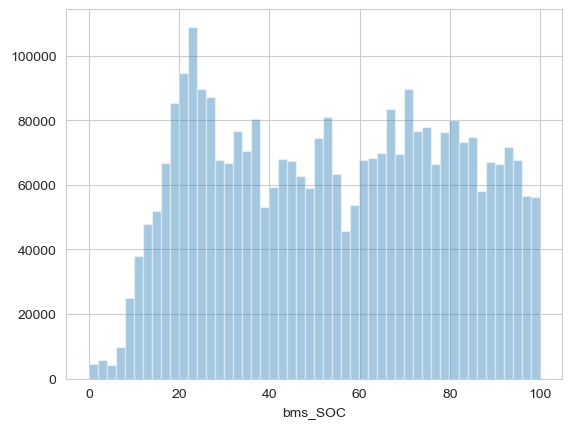

In [7]:
import seaborn as sns

sns.distplot(data_raw[data_raw.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)

C:\Users\696292\AppData\Local\Temp\ipykernel_11788\3893297907.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_raw.bcm_HvOnRequest, hist=True, kde=False)


<Axes: xlabel='bcm_HvOnRequest'>

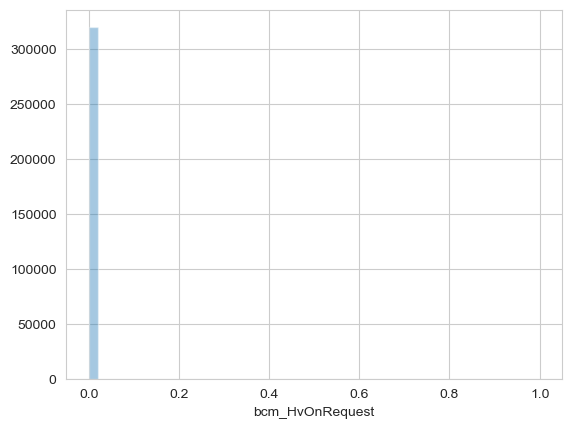

In [5]:
import seaborn as sns

sns.distplot(data_raw.bcm_HvOnRequest, hist=True, kde=False)

In [ ]:
data_raw.head(20)

In [2]:
# 填充操作
data= data_raw[data_raw.vin == 'LM8F7D897NA000312'].fillna(method='ffill').sort_values(by="collect_ts")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200596 entries, 2210110 to 1015972
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       200596 non-null  object 
 1   collect_ts                200596 non-null  int64  
 2   uuid                      200596 non-null  object 
 3   model_name                200596 non-null  object 
 4   series_code               200596 non-null  object 
 5   msg_create_time           200596 non-null  object 
 6   vcu_VehicleMode           200596 non-null  float32
 7   vcu_vehicleSpeed          200596 non-null  float32
 8   VCU_VehicleSpeedValid     200596 non-null  float32
 9   vcu_state                 200596 non-null  float32
 10  bms_SOC                   200596 non-null  float32
 11  bms_state                 200596 non-null  float32
 12  BCM_ebs_U_BATT            200587 non-null  float32
 13  BCM_ebs_SOC               200587 non-null 

C:\Users\696292\AppData\Local\Temp\ipykernel_10040\3407701775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)


<Axes: xlabel='bms_SOC'>

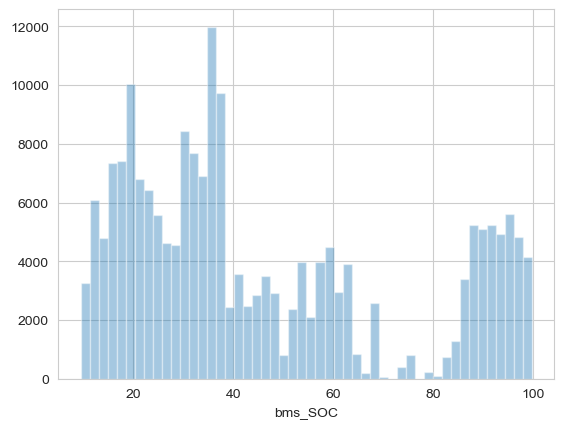

In [3]:
import seaborn as sns

sns.distplot(data[data.bms_SOC < 100.0].bms_SOC, hist=True, kde=False)

In [4]:
data = data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 18.)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200587 entries, 2210110 to 1015972
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       200587 non-null  object 
 1   collect_ts                200587 non-null  int64  
 2   uuid                      200587 non-null  object 
 3   model_name                200587 non-null  object 
 4   series_code               200587 non-null  object 
 5   msg_create_time           200587 non-null  object 
 6   vcu_VehicleMode           200587 non-null  float32
 7   vcu_vehicleSpeed          200587 non-null  float32
 8   VCU_VehicleSpeedValid     200587 non-null  float32
 9   vcu_state                 200587 non-null  float32
 10  bms_SOC                   200587 non-null  float32
 11  bms_state                 200587 non-null  float32
 12  BCM_ebs_U_BATT            200587 non-null  float32
 13  BCM_ebs_SOC               200587 non-null 

In [ ]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

In [ ]:
import matplotlib.pyplot as plt
data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 11.)].BCM_ebs_U_BATT.hist(bins=12, figsize=(5,3))
plt.show()

In [3]:
data_copy = data.copy()

data_copy['date'] = pd.to_datetime(data_copy["collect_ts"], unit='ms')

data_copy = data_copy.set_index("date")
data_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,bms_pLimitDrive,bms_pLimitRegen,bcm_HvOnRequest,esc_vehicleSpeed,esc_vehicleSpeedValid,ac_ambientTemp,ac_ambientTempValid,vcu_highVoltageIndicator,bcm_HvOffRequest,BCM_EBS_State
date,,,,,,,,,,,,,,,,,,,,,
2023-04-02 03:59:35.018,LM8F7D897NA000312,1680407975018,LM8F7D897NA000312#1682453266786#8214,B24ERF6EF3L00,SERES-X1,1682453266703,1.0,0.0,0.0,0.0,...,168.25,-117.0,0.0,460.743744,0.0,16.5,1.0,1.0,0.0,0.0
2023-04-02 03:59:36.018,LM8F7D897NA000312,1680407976018,LM8F7D897NA000312#1682453266786#8214,B24ERF6EF3L00,SERES-X1,1682453266703,1.0,0.0,0.0,0.0,...,168.25,-117.0,0.0,460.743744,0.0,16.5,1.0,1.0,0.0,0.0
2023-04-02 03:59:37.018,LM8F7D897NA000312,1680407977018,LM8F7D897NA000312#1682453266786#8214,B24ERF6EF3L00,SERES-X1,1682453266703,1.0,0.0,0.0,0.0,...,168.25,-117.0,0.0,460.743744,0.0,16.5,1.0,1.0,0.0,0.0
2023-04-02 03:59:38.018,LM8F7D897NA000312,1680407978018,LM8F7D897NA000312#1682453266786#8214,B24ERF6EF3L00,SERES-X1,1682453266703,1.0,0.0,0.0,0.0,...,168.25,-117.0,0.0,460.743744,0.0,16.5,1.0,1.0,0.0,0.0
2023-04-02 03:59:39.018,LM8F7D897NA000312,1680407979018,LM8F7D897NA000312#1682453266786#8214,B24ERF6EF3L00,SERES-X1,1682453266703,1.0,0.0,0.0,0.0,...,168.25,-117.0,0.0,460.743744,0.0,16.5,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 15:27:39.131,LM8F7D897NA000312,1682350059131,LM8F7D897NA000312#1682434832215#2139,B24ERF6EF3L00,SERES-X1,1682434832138,3.0,0.0,0.0,0.0,...,110.00,-119.0,0.0,0.000000,1.0,12.0,1.0,1.0,0.0,0.0
2023-04-24 15:27:40.131,LM8F7D897NA000312,1682350060131,LM8F7D897NA000312#1682434832215#2139,B24ERF6EF3L00,SERES-X1,1682434832138,3.0,0.0,0.0,0.0,...,110.00,-119.0,0.0,0.000000,1.0,12.0,1.0,1.0,0.0,0.0
2023-04-24 15:27:41.131,LM8F7D897NA000312,1682350061131,LM8F7D897NA000312#1682434832215#2139,B24ERF6EF3L00,SERES-X1,1682434832138,3.0,0.0,0.0,0.0,...,110.00,-119.0,0.0,0.000000,1.0,12.0,1.0,1.0,0.0,0.0


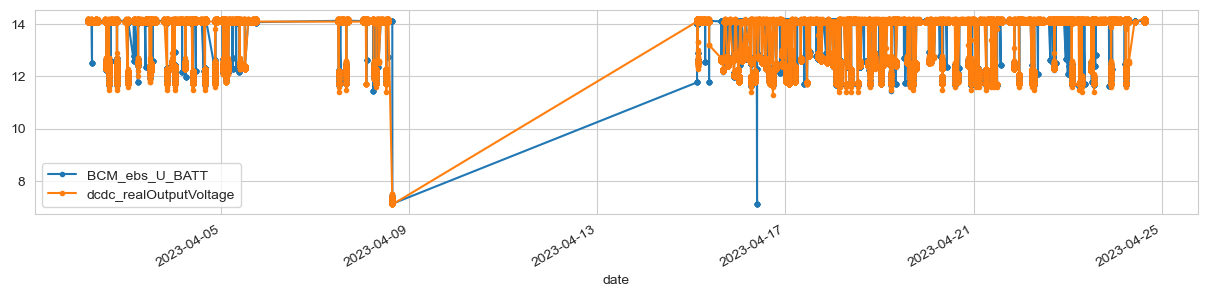

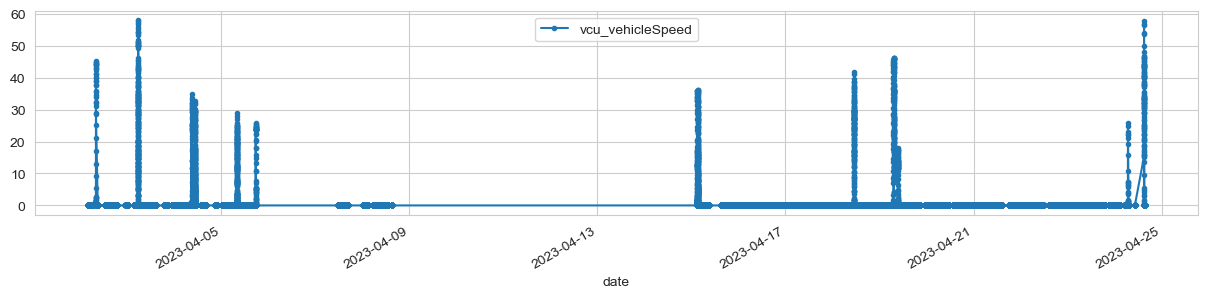

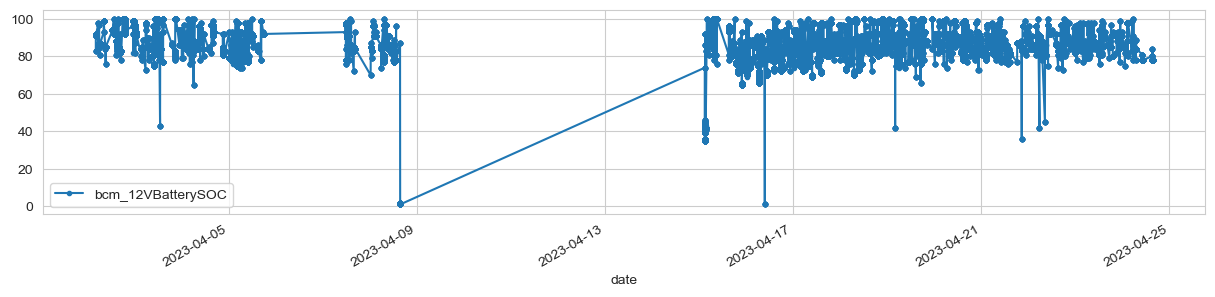

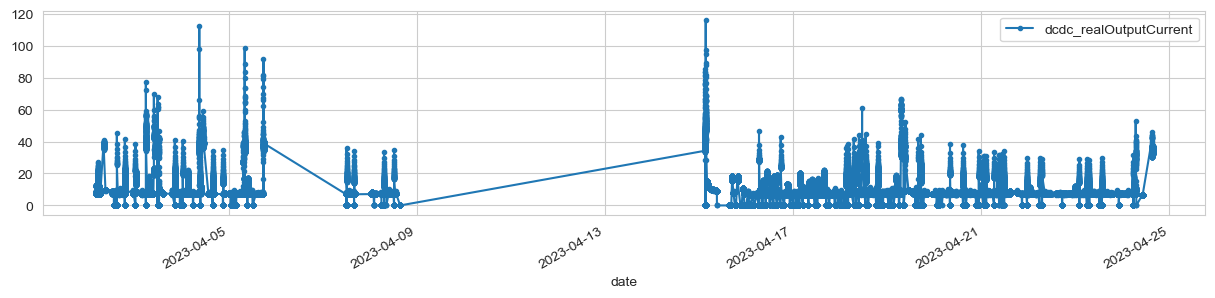

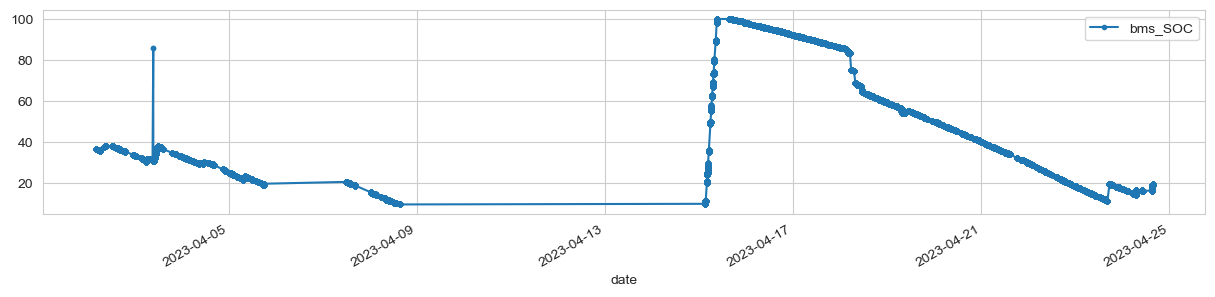

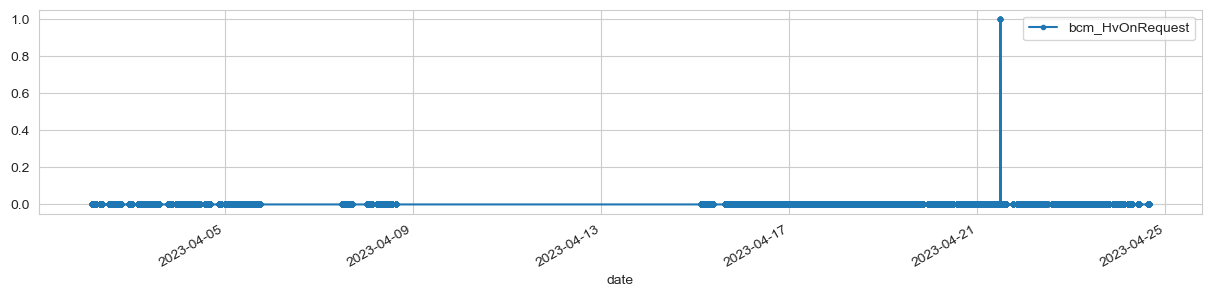

In [4]:
import matplotlib.pyplot as plt

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bcm_12VBatterySOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bcm_HvOnRequest"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

1. DC-DC 有输出的前提是高压上电
2. 当 DC-DC 有输出时，小电瓶电压会很快和其保持一致
3.

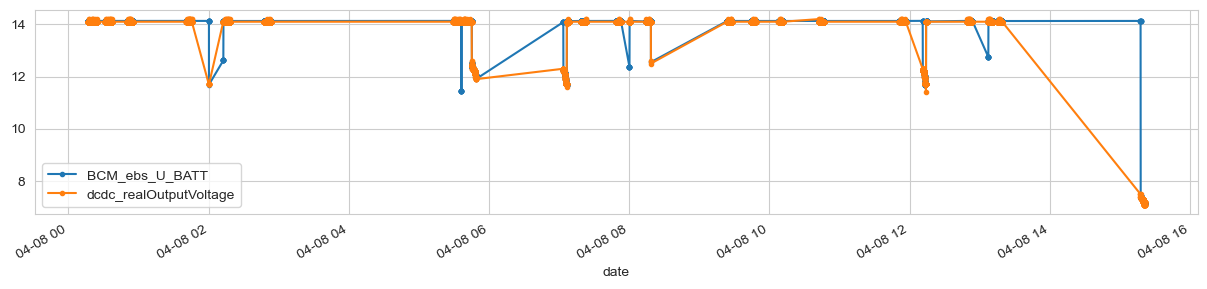

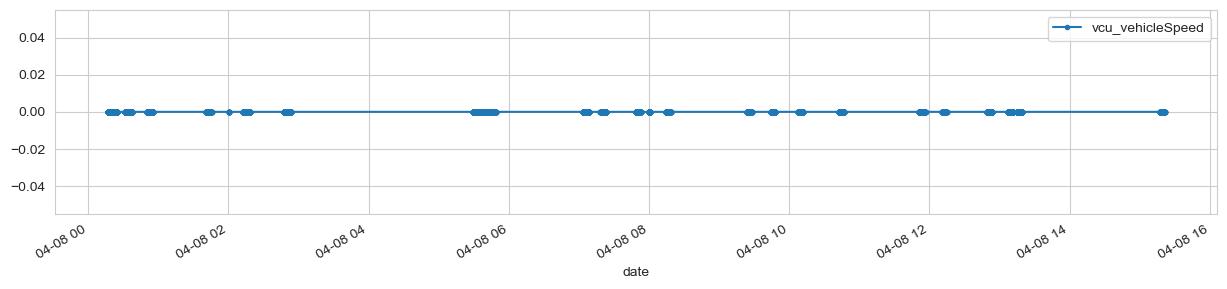

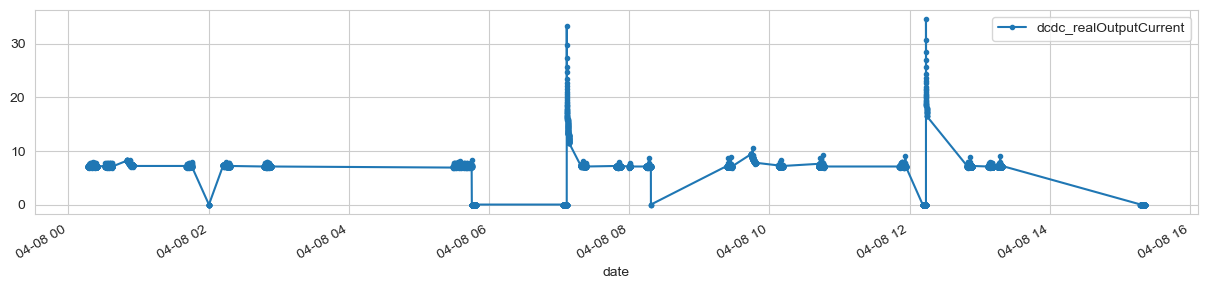

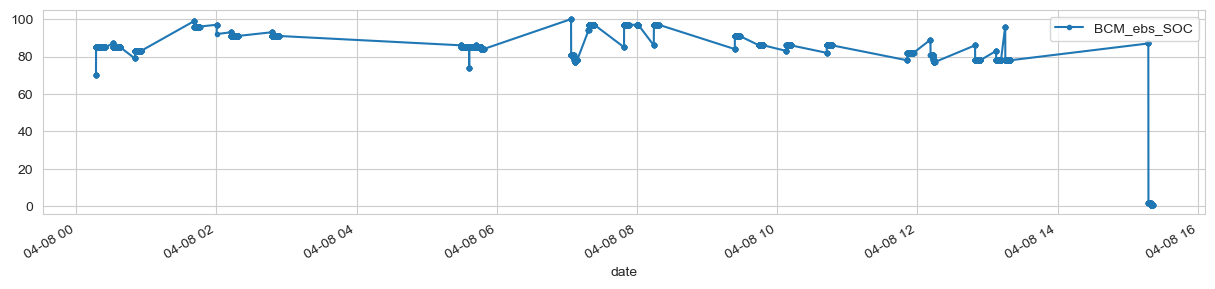

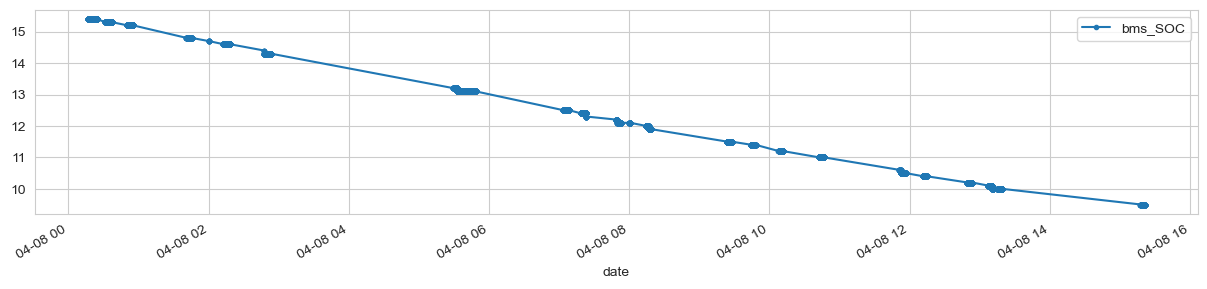

In [9]:
import matplotlib.pyplot as plt

data_copy["2023-04-08 00:00:00":"2023-04-08 23:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-08 00:00:00":"2023-04-08 23:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 00:00:00":"2023-04-08 23:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 00:00:00":"2023-04-08 23:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 00:00:00":"2023-04-08 23:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()